In [1]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt

In [2]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

**Hyper Parameters**

In [3]:
TIME_STEP = 10
INPUT_SIZE = 1
LR = 0.02

**Fake Data**

In [4]:
steps = np.linspace(start=0,stop=np.pi*2,num=100,dtype=np.float32)

In [5]:
x_np=np.sin(steps)
y_np=np.cos(steps)

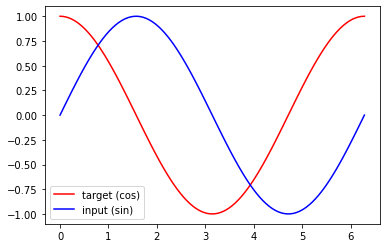

In [6]:
plt.plot(steps,y_np,'r-',label='target (cos)')
plt.plot(steps,x_np,'b-',label='input (sin)')
plt.legend()
plt.show()

**RNN Model**

In [7]:
class RNN(nn.Module):
  def __init__(self):
    super().__init__()
    self.rnn = nn.RNN(
        input_size = INPUT_SIZE,
        hidden_size = 32,
        num_layers = 1,
        batch_first=True
    )
    self.out = nn.Linear(in_features=32,out_features=1)

  def forward(self, x, h_state):
    '''
    x (batch, time_step, input_size)
    h_state (n_layers, batch, hidden_size)
    r_out (batch, time_step, hidden_size)
    '''
    r_out, h_state = self.rnn(x, h_state)
    outs = []
    for time_step in range(r_out.size(1)):
      outs.append(self.out(r_out[:,time_step,:]))
    return torch.stack(outs, dim=1), h_state

In [8]:
rnn = RNN().to(device)
print(rnn)

RNN(
  (rnn): RNN(1, 32, batch_first=True)
  (out): Linear(in_features=32, out_features=1, bias=True)
)


**Optimizer and Loss**

In [9]:
optimizer = torch.optim.Adam(rnn.parameters(),lr=LR)
loss_func = nn.MSELoss()

In [10]:
h_state = None

In [11]:
plt.close()

**Training Loop**

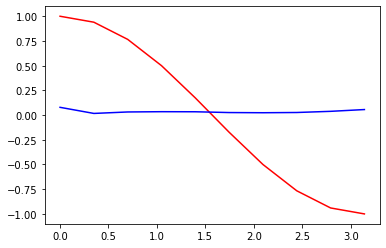

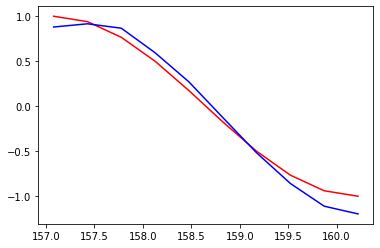

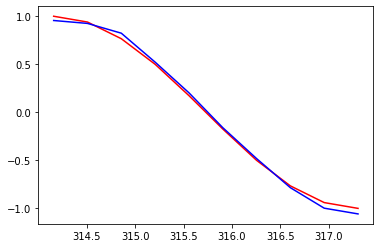

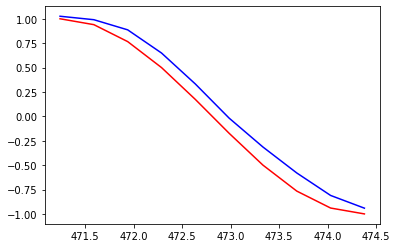

In [12]:
for step in range(200):
  start, end = step*np.pi, (step+1)*np.pi
  steps = np.linspace(start=start,stop=end,num=10,dtype=np.float32)
  x_np = np.sin(steps)
  y_np = np.cos(steps)

  x = torch.from_numpy(x_np[np.newaxis,:,np.newaxis]).to(device)  # shape (batch, timestep, input_size)
  y = torch.from_numpy(y_np[np.newaxis,:,np.newaxis]).to(device)

  prediction, h_state = rnn(x, h_state)
  h_state = h_state.data

  loss = loss_func(prediction, y)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # plotting
  if step % 50 == 0:
    plt.plot(steps, y_np.flatten(), 'r-')
    plt.plot(steps, prediction.data.cpu().numpy().flatten(), 'b-')
    plt.draw(); plt.pause(0.05)